In [1]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib
import numpy as np

In [2]:
max_interval_time=timedelta(hours=3)
min_interval_time=timedelta(seconds=0)
##Read origin data
df=pd.read_pickle('data/2to9data.pkl')

In [3]:
#df

In [4]:
#df.loc[df['user']=='11011110110011000101100010000010']

In [5]:
#get the list of the User
# userlist=df['user'].drop_duplicates()
# userlist=userlist.iloc[::-1]
#userlist

In [6]:
#show single user data
#df.loc[df_short['user']==userlist.iloc[0]]

In [7]:
##transfer the 'time' data from str to datatime for subsequent processing
df['time']=pd.to_datetime(df['time'])
df['interval']=df['time'].shift(-1)-df['time']#to get the watch interval by subtracting from row to row
df_cut=df.drop(df.groupby(['user']).tail(1).index, axis=0)#throw the last record of each user as the interval is invalid

In [8]:
#df_cut

In [9]:
#WI for Watch_Interval and we eliminate the watch interval==0 second or >3 hours which we think it is in inactive status
WI=df_cut.drop(df_cut[df_cut['interval']<=min_interval_time].index)
WI=WI.drop(WI[WI['interval']>max_interval_time].index)

In [10]:
WI

,time,user,item,interval
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02
...,...,...,...,...
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46


In [29]:
# to get the max watch time for each item from all users, and we consider it as the max length of the item
max_watchtime=WI.groupby(['item'])[['item','interval']].max().rename(columns={'interval':'max_interval'})

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(max_watchtime.head(1000))

,time,item,max_interval
item,,,
,2010-07-03 23:58:47,,0 days 02:55:42
(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,2010-06-28 22:10:05,(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,0 days 00:16:26
(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,2010-06-30 15:56:03,(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,0 days 00:00:23
00100512中道齐家三部曲之二家庭教育(1).mp4,2010-07-03 18:42:09,00100512中道齐家三部曲之二家庭教育(1).mp4,0 days 00:29:12
00100512中道齐家三部曲之二家庭教育(10).mp4,2010-07-02 12:00:37,00100512中道齐家三部曲之二家庭教育(10).mp4,0 days 00:51:31
00100512中道齐家三部曲之二家庭教育(11).mp4,2010-07-02 12:52:08,00100512中道齐家三部曲之二家庭教育(11).mp4,0 days 00:01:57
00100512中道齐家三部曲之二家庭教育(2).mp4,2010-07-03 18:55:45,00100512中道齐家三部曲之二家庭教育(2).mp4,0 days 00:51:16
00100512中道齐家三部曲之二家庭教育(3).mp4,2010-07-01 11:51:38,00100512中道齐家三部曲之二家庭教育(3).mp4,0 days 00:30:09
00100512中道齐家三部曲之二家庭教育(4).mp4,2010-07-01 11:51:47,00100512中道齐家三部曲之二家庭教育(4).mp4,0 days 00:25:58


In [45]:
# df.loc[df['item']=='100126女孩的精湛射术.mp4']
# df.loc[(df['time']=='2010-06-30 04:02:37') &(df['item']=='100126女孩的精湛射术.mp4')]['user'].values[0]
# df.loc[df['user']==df.loc[(df['time']=='2010-06-30 04:02:37') &(df['item']=='100126女孩的精湛射术.mp4')]['user'].values[0]]

In [20]:
#caculate the watch ratio 
summary=WI.join(max_watchtime.set_index('item'), on='item')
summary['watch_ratio']=summary['interval']/summary['max_interval']

In [43]:
summary

,time,user,item,interval,max_interval,watch_ratio
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,0 days 02:58:59,0.090604
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22,0 days 00:54:19,0.006751
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:13:01,0.002561
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:13:01,0.002561
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02,0 days 00:54:19,0.534520
...,...,...,...,...,...,...
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54,0 days 02:58:57,0.301201
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52,0 days 02:58:57,0.301015
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25,0 days 02:57:24,0.515314
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46,0 days 02:59:40,0.560853


In [22]:
test=summary.copy()

In [23]:
test.drop(test[test['watch_ratio']==1].index)

,time,user,item,interval,max_interval,watch_ratio
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,0 days 02:58:59,0.090604
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22,0 days 00:54:19,0.006751
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:13:01,0.002561
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:13:01,0.002561
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02,0 days 00:54:19,0.534520
...,...,...,...,...,...,...
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54,0 days 02:58:57,0.301201
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52,0 days 02:58:57,0.301015
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25,0 days 02:57:24,0.515314
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46,0 days 02:59:40,0.560853


In [ ]:
test2=test.drop(test[test['watch ratio']==1].index)
test2['watch ratio'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

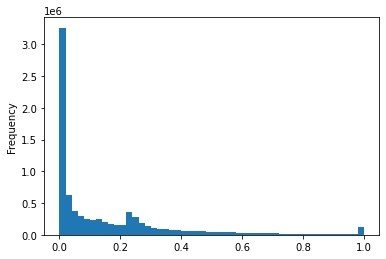

In [24]:
test['watch_ratio'].plot.hist(bins=50)

In [42]:
len(test)

8348068

In [44]:
summary.to_pickle('10M_watch_ratio_without_connection_without_drop_dupilcate.pkl')